# ANÁLISIS EXPLORATORIO DE VENTAS

Análisis de Datos de Ventas - practica_completo.csv

**Objetivo:**

Realizar un análisis exploratorio exhaustivo del dataset de ventas para identificar patrones, tendencias, anomalías y características clave que permitan entender el comportamiento de la demanda de productos.

---

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("Librerías cargadas correctamente")

Librerías cargadas correctamente


## Parte 1: Carga y Exploración Inicial

Cargar el dataset de forma eficiente y realizar una inspección inicial de su estructura, tipos de datos y valores faltantes.

In [2]:
# Cargar dataset con optimización de memoria
ruta = Path('practica_completo.csv')

print("Cargando dataset...")
print(f"   Archivo: {ruta}")
print(f"   Tamaño: {ruta.stat().st_size / (1024**2):.2f} MB")

# Leer primeras filas para inspeccionar tipos de datos
df_sample = pd.read_csv(ruta, nrows=1000)
print(f"\nColumnas detectadas: {len(df_sample.columns)}")
print(df_sample.columns.tolist())

# Optimizar tipos de datos para reducir memoria
dtype_dict = {}
for col in df_sample.columns:
    if df_sample[col].dtype == 'int64':
        dtype_dict[col] = 'int32'
    elif df_sample[col].dtype == 'float64':
        dtype_dict[col] = 'float32'

# Cargar dataset completo con tipos optimizados
df = pd.read_csv(ruta, dtype=dtype_dict, parse_dates=['created_at', 'last_order_date'])

print(f"\nDataset cargado exitosamente")
print(f"   Filas originales: {len(df):,}")
print(f"   Columnas: {len(df.columns)}")

# Filtrar datos del último año
fecha_limite = df['created_at'].max() - pd.Timedelta(days=365)
df = df[df['created_at'] >= fecha_limite]

print(f"\nFiltrado al último año:")
print(f"   Fecha límite: {fecha_limite}")
print(f"   Filas después del filtro: {len(df):,}")
print(f"   Memoria utilizada: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

# Variables temporales y especiales
print(f"\nCreando variables adicionales...")

df['dia_semana'] = df['created_at'].dt.dayofweek
df['mes'] = df['created_at'].dt.month
df['fin_semana'] = df['dia_semana'].isin([5,6]).astype(int)

# Feriados ecuatorianos 2024
feriados = [
    '2024-01-01', '2024-02-12', '2024-02-13', '2024-03-29', '2024-05-01',
    '2024-05-24', '2024-08-10', '2024-10-09', '2024-11-02', '2024-11-03', '2024-12-25'
]
df['fecha_str'] = df['created_at'].dt.date.astype(str)
df['feriado'] = df['fecha_str'].isin(feriados).astype(int)

# Antigüedad del producto (en días)
df['antiguedad_producto'] = (df['created_at'] - df.groupby('product_id')['created_at'].transform('min')).dt.days

# Ratio vendida/stock
df['ratio_vendida_stock'] = df['salida'] / (df['quantity_on_hand'] + 1e-6)

print(f"   Variables creadas: dia_semana, mes, fin_semana, feriado, antiguedad_producto, ratio_vendida_stock")
print(f"   Registros en fines de semana: {df['fin_semana'].sum():,}")
print(f"   Registros en feriados: {df['feriado'].sum():,}")

Cargando dataset...
   Archivo: practica_completo.csv
   Tamaño: 52.72 MB

Columnas detectadas: 13
['id', 'created_at', 'product_id', 'product_name', 'product_sku', 'quantity_on_hand', 'last_order_date', 'unit_cost', 'shelf_location', 'notes', 'entrada', 'salida', 'detalle']

Dataset cargado exitosamente
   Filas originales: 330,856
   Columnas: 13

Filtrado al último año:
   Fecha límite: 2024-10-13 16:23:05
   Filas después del filtro: 118,281
   Memoria utilizada: 43.38 MB

Creando variables adicionales...
   Variables creadas: dia_semana, mes, fin_semana, feriado, antiguedad_producto, ratio_vendida_stock
   Registros en fines de semana: 40,962
   Registros en feriados: 1,406

Dataset cargado exitosamente
   Filas originales: 330,856
   Columnas: 13

Filtrado al último año:
   Fecha límite: 2024-10-13 16:23:05
   Filas después del filtro: 118,281
   Memoria utilizada: 43.38 MB

Creando variables adicionales...
   Variables creadas: dia_semana, mes, fin_semana, feriado, antiguedad_pr

In [3]:
# Información general del dataset
print("="*70)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*70)

print("\n1. Información de tipos de datos:")
print(df.info())

print("\n2. Estadísticas descriptivas (variables numéricas):")
display(df.describe())

print("\n3. Primeras 10 filas:")
display(df.head(10))

print("\n4. Últimas 10 filas:")
display(df.tail(10))

INFORMACIÓN GENERAL DEL DATASET

1. Información de tipos de datos:
<class 'pandas.core.frame.DataFrame'>
Index: 118281 entries, 212575 to 330855
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   118281 non-null  int32         
 1   created_at           118281 non-null  datetime64[ns]
 2   product_id           118281 non-null  int32         
 3   product_name         118281 non-null  object        
 4   product_sku          118281 non-null  object        
 5   quantity_on_hand     118281 non-null  float32       
 6   last_order_date      118281 non-null  datetime64[ns]
 7   unit_cost            118281 non-null  float32       
 8   shelf_location       118281 non-null  object        
 9   notes                116671 non-null  object        
 10  entrada              118281 non-null  float32       
 11  salida               118281 non-null  float32       
 12  detal

,id,created_at,product_id,quantity_on_hand,last_order_date,unit_cost,entrada,salida,dia_semana,mes,fin_semana,feriado,antiguedad_producto,ratio_vendida_stock
count,118281.00000,118281,118281.000000,118281.000000,118281,118281.000000,118281.000000,118281.000000,118281.000000,118281.000000,118281.000000,118281.000000,118281.000000,1.182810e+05
mean,368301.22734,2025-04-11 20:24:36.435057408,14332.126656,182.290146,2025-04-11 20:24:36.435057408,1.956332,0.362915,1.384728,3.300006,6.729745,0.346311,0.011887,103.754956,5.552893e+04
min,296775.00000,2024-10-13 16:30:38,360.000000,0.000000,2024-10-13 16:30:38,-1.060000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,332129.00000,2025-01-05 11:39:44,7401.000000,6.000000,2025-01-05 11:39:44,0.410000,0.000000,1.000000,2.000000,4.000000,0.000000,0.000000,16.000000,1.428571e-02
50%,368910.00000,2025-04-11 16:24:43,15690.000000,20.000000,2025-04-11 16:24:43,1.000000,0.000000,1.000000,4.000000,7.000000,0.000000,0.000000,71.000000,5.555555e-02
75%,403584.00000,2025-07-06 15:25:43,21653.000000,83.000000,2025-07-06 15:25:43,2.360000,0.000000,1.000000,5.000000,10.000000,1.000000,0.000000,174.000000,2.000000e-01
max,438269.00000,2025-10-13 16:23:05,26947.000000,16623.000000,2025-10-13 16:23:05,168.000000,2496.000000,19.000000,6.000000,12.000000,1.000000,1.000000,364.000000,1.500000e+07
std,40745.27528,NaN,7893.213293,793.446899,NaN,3.274689,12.769449,1.397273,1.966156,3.505403,0.475796,0.108378,99.803972,3.145024e+05



3. Primeras 10 filas:


,id,created_at,product_id,product_name,product_sku,quantity_on_hand,last_order_date,unit_cost,shelf_location,notes,entrada,salida,detalle,dia_semana,mes,fin_semana,fecha_str,feriado,antiguedad_producto,ratio_vendida_stock
212575,296775,2024-10-13 16:30:38,1763,MIA SECRET COVER GOLDEN ACRYLIC 15G,842342110708,0.0,2024-10-13 16:30:38,0.00,VITRINA DE UÑAS,S/N,0.0,1.0,NotaVenta doc. 001-050-000057208,6,10,1,2024-10-13,0,0,1000000.000000
212576,296776,2024-10-13 16:31:01,1417,TINTE MAGICO NEGR0 10G,7705233100284,50.0,2024-10-13 16:31:01,0.58,ESTAN DE PELUQUERIA,S/N\r\n,0.0,2.0,NotaVenta doc. 001-050-000057209,6,10,1,2024-10-13,0,0,0.040000
212577,296777,2024-10-13 16:34:33,12926,LIMA OPI OVALADO 100 100,00000000004270A,81.0,2024-10-13 16:34:33,0.16,VITRINA DE TOMATODOS,iva\r\n,0.0,1.0,NotaVenta doc. 001-050-000057210,6,10,1,2024-10-13,0,0,0.012346
212578,296778,2024-10-13 16:34:33,19765,BLUSH SUPER FANTASTIC,6921932713254,19.0,2024-10-13 16:34:33,1.15,LOCAL PRINCIPAL,S/N\r\n,0.0,1.0,NotaVenta doc. 001-050-000057210,6,10,1,2024-10-13,0,0,0.052632
212579,296779,2024-10-13 16:37:10,2708,ESMALTE NACARADO ROSADO NAILS,7707302540540,1.0,2024-10-13 16:37:10,1.25,VITRINA DE ESMALTES,S/N,0.0,1.0,NotaVenta doc. 001-050-000057211,6,10,1,2024-10-13,0,0,0.999999
212580,296780,2024-10-13 16:37:10,17853,ESMALTE VOGUE AMBROSIA 332,7509552843521,6.0,2024-10-13 16:37:10,0.99,ESTANTE DE SHAMPOOS,S/N\r\n,0.0,1.0,NotaVenta doc. 001-050-000057211,6,10,1,2024-10-13,0,0,0.166667
212581,296781,2024-10-13 16:37:10,2293,ACETONA JYL 90ML NAILS,7862113780117,227.0,2024-10-13 16:37:10,0.42,VITRINA DE ESMALTES,S/N\r\n,0.0,1.0,NotaVenta doc. 001-050-000057211,6,10,1,2024-10-13,0,0,0.004405
212582,296782,2024-10-13 16:37:10,8390,ALGODON DOMESANA 5G,7862113780216,380.0,2024-10-13 16:37:10,0.16,LOCAL PRINCIPAL,S/N\r\n,0.0,1.0,NotaVenta doc. 001-050-000057211,6,10,1,2024-10-13,0,0,0.002632
212583,296784,2024-10-13 16:37:56,3285,ARETES BEATIFUL JEWELRY FASHION,00000000000878A,163.0,2024-10-13 16:37:56,0.67,VITRINA DE ARETES 1,S/N\r\n,0.0,1.0,NotaVenta doc. 001-050-000057212,6,10,1,2024-10-13,0,0,0.006135
212584,296785,2024-10-13 16:38:36,4588,COBIJILLA ECONOMICA MODELOS,00000000001371A,235.0,2024-10-13 16:38:36,3.29,LOCAL DE EDREDONES,S/N\r\n,0.0,1.0,NotaVenta doc. 001-050-000057213,6,10,1,2024-10-13,0,0,0.004255



4. Últimas 10 filas:


,id,created_at,product_id,product_name,product_sku,quantity_on_hand,last_order_date,unit_cost,shelf_location,notes,entrada,salida,detalle,dia_semana,mes,fin_semana,fecha_str,feriado,antiguedad_producto,ratio_vendida_stock
330846,438260,2025-10-13 15:35:39,11116,SOBRES DINE BEIGE Y BLANCO,788070540939,934.0,2025-10-13 15:35:39,0.07,VITRINA DE LABIALES,S/N\r\n,0.0,1.0,NotaVenta doc. 001-050-000084144,0,10,0,2025-10-13,0,361,0.001071
330847,438261,2025-10-13 15:35:39,9969,VELA NUMEROS MAGICAS,00000000003389A,1076.0,2025-10-13 15:35:39,0.20,LOCAL PRINCIPAL,S/N\r\n,0.0,2.0,NotaVenta doc. 001-050-000084144,0,10,0,2025-10-13,0,352,0.001859
330848,438262,2025-10-13 15:35:56,4003,SOMBRILLA AUTOMATICA 525-5/600,00000000001163A,120.0,2025-10-13 15:35:56,2.56,LOCAL PRINCIPAL,S/N\r\n,0.0,1.0,NotaVenta doc. 001-050-000084145,0,10,0,2025-10-13,0,363,0.008333
330849,438263,2025-10-13 15:58:57,26266,CUERDA DE SALTAR CONTADOR,7803109260923,20.0,2025-10-13 15:58:57,0.73,LOCAL PRINCIPAL,S/N\r\n,0.0,1.0,NotaVenta doc. 001-050-000084146,0,10,0,2025-10-13,0,0,0.050000
330850,438264,2025-10-13 16:13:55,22388,PELOTA CHILLON CON LUCES,00000000006171A,56.0,2025-10-13 16:13:55,0.60,LOCAL PRINCIPAL,S/N\r\n,0.0,2.0,NotaVenta doc. 001-050-000084147,0,10,0,2025-10-13,0,261,0.035714
330851,438265,2025-10-13 16:15:41,8396,MOÑO LIGA GERALDY NEGRA,NC1672,1811.0,2025-10-13 16:15:41,0.12,LOCAL PRINCIPAL,S/N\r\n,0.0,1.0,NotaVenta doc. 001-050-000084148,0,10,0,2025-10-13,0,363,0.000552
330852,438266,2025-10-13 16:22:18,5896,LABIAL MAGICO,00000000001967A,139.0,2025-10-13 16:22:18,0.25,VITRINA DE CREMAS,S/N\r\n,0.0,1.0,NotaVenta doc. 001-050-000084149,0,10,0,2025-10-13,0,364,0.007194
330853,438267,2025-10-13 16:23:05,8351,PERFILADOR DE CEJAS TINKLE X3,8801038123622,3.0,2025-10-13 16:23:05,0.36,TABLERO DE BROCHAS,S/N\r\n,0.0,1.0,Factura doc. 001-050-000329895,0,10,0,2025-10-13,0,221,0.333333
330854,438268,2025-10-13 16:23:05,26410,FACE WASH COLLAGEN,6903072454983,10.0,2025-10-13 16:23:05,1.96,LOCAL PRINCIPAL,S/N\r\n,0.0,1.0,Factura doc. 001-050-000329895,0,10,0,2025-10-13,0,15,0.100000
330855,438269,2025-10-13 16:23:05,8812,POLVO COMPACTO ARROZ BARDOT 2,7703799208024,5.0,2025-10-13 16:23:05,1.98,LOCAL PRINCIPAL,S/N\r\n,0.0,1.0,Factura doc. 001-050-000329895,0,10,0,2025-10-13,0,340,0.200000


ANÁLISIS DE FINES DE SEMANA Y FERIADOS

Comparación de ventas por tipo de día:


,Tipo de Día,Total Ventas,Promedio Ventas,Mediana,Num Registros
0,Laborable,110872.0,1.433955,1.0,77319
1,Fin de Semana,52915.0,1.291807,1.0,40962
2,Feriado,1793.0,1.275249,1.0,1406


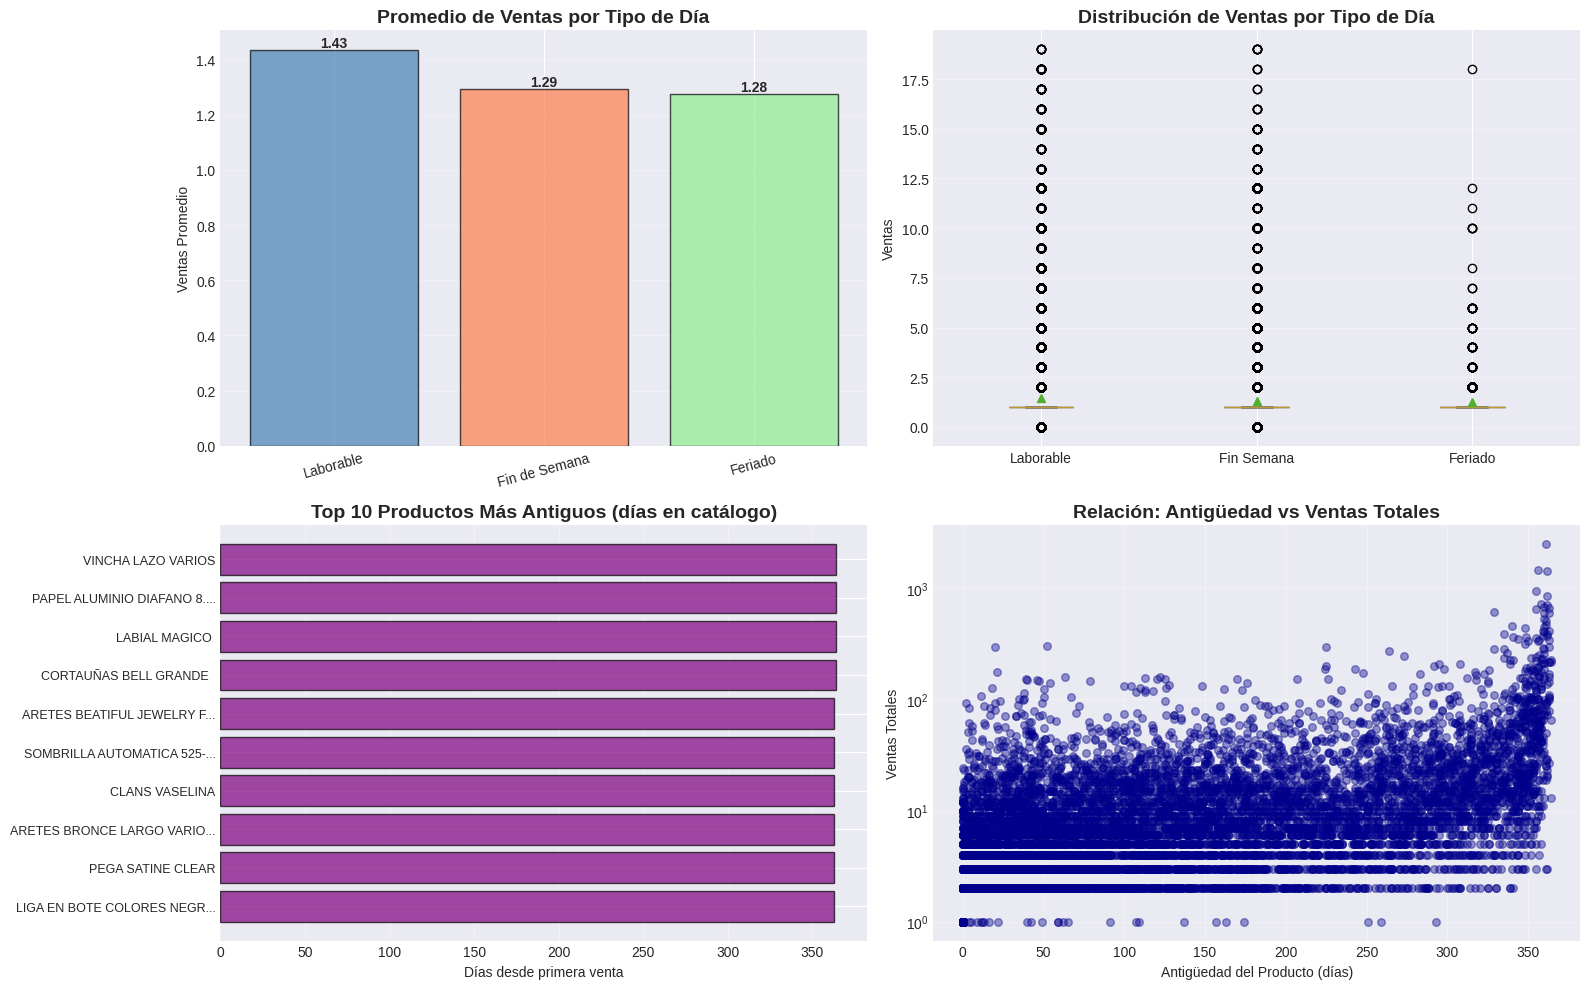


Estadísticas de antigüedad del producto:
   Promedio: 103.8 días
   Mediana: 71.0 días
   Máximo: 364 días

Impacto de feriados:
   Cambio en ventas promedio vs laborables: -11.1%


In [4]:
# Análisis de fines de semana y feriados
print("="*70)
print("ANÁLISIS DE FINES DE SEMANA Y FERIADOS")
print("="*70)

# Comparación de ventas: días laborales vs fin de semana
ventas_laborales = df[df['fin_semana'] == 0]['salida']
ventas_finde = df[df['fin_semana'] == 1]['salida']
ventas_feriados = df[df['feriado'] == 1]['salida']

ventas_por_tipo_dia = pd.DataFrame({
    'Tipo de Día': ['Laborable', 'Fin de Semana', 'Feriado'],
    'Total Ventas': [ventas_laborales.sum(), ventas_finde.sum(), ventas_feriados.sum()],
    'Promedio Ventas': [ventas_laborales.mean(), ventas_finde.mean(), ventas_feriados.mean()],
    'Mediana': [ventas_laborales.median(), ventas_finde.median(), ventas_feriados.median()],
    'Num Registros': [len(ventas_laborales), len(ventas_finde), len(ventas_feriados)]
})

print("\nComparación de ventas por tipo de día:")
display(ventas_por_tipo_dia)

# Visualización mejorada
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Gráfico 1: Promedio de ventas por tipo de día (más relevante que total)
axes[0, 0].bar(ventas_por_tipo_dia['Tipo de Día'], ventas_por_tipo_dia['Promedio Ventas'], 
           color=['steelblue', 'coral', 'lightgreen'], alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Promedio de Ventas por Tipo de Día', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Ventas Promedio')
axes[0, 0].tick_params(axis='x', rotation=15)
axes[0, 0].grid(True, alpha=0.3, axis='y')
# Añadir valores sobre las barras
for i, v in enumerate(ventas_por_tipo_dia['Promedio Ventas']):
    axes[0, 0].text(i, v, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Boxplot comparativo (muestra distribución completa)
data_boxplot = [ventas_laborales, ventas_finde, ventas_feriados]
bp = axes[0, 1].boxplot(data_boxplot, labels=['Laborable', 'Fin Semana', 'Feriado'], 
                         patch_artist=True, showmeans=True)
for patch, color in zip(bp['boxes'], ['steelblue', 'coral', 'lightgreen']):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[0, 1].set_title('Distribución de Ventas por Tipo de Día', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Ventas')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Gráfico 3: Top 10 productos por antigüedad
antiguedad_productos = df.groupby('product_id').agg({
    'antiguedad_producto': 'max',
    'salida': 'sum',
    'product_name': 'first'
}).sort_values('antiguedad_producto', ascending=False).head(10)

axes[1, 0].barh(range(len(antiguedad_productos)), antiguedad_productos['antiguedad_producto'].values, 
               color='purple', alpha=0.7, edgecolor='black')
axes[1, 0].set_yticks(range(len(antiguedad_productos)))
axes[1, 0].set_yticklabels([f'{name[:25]}...' if len(name) > 25 else name 
                             for name in antiguedad_productos['product_name']], fontsize=9)
axes[1, 0].invert_yaxis()
axes[1, 0].set_title('Top 10 Productos Más Antiguos (días en catálogo)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Días desde primera venta')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Gráfico 4: Ventas vs Antigüedad del producto (scatter)
# Agregar por producto
producto_stats = df.groupby('product_id').agg({
    'antiguedad_producto': 'max',
    'salida': 'sum'
}).reset_index()

axes[1, 1].scatter(producto_stats['antiguedad_producto'], producto_stats['salida'], 
                  alpha=0.4, s=30, color='darkblue')
axes[1, 1].set_title('Relación: Antigüedad vs Ventas Totales', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Antigüedad del Producto (días)')
axes[1, 1].set_ylabel('Ventas Totales')
axes[1, 1].set_yscale('log')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas adicionales
print(f"\nEstadísticas de antigüedad del producto:")
print(f"   Promedio: {df['antiguedad_producto'].mean():.1f} días")
print(f"   Mediana: {df['antiguedad_producto'].median():.1f} días")
print(f"   Máximo: {df['antiguedad_producto'].max()} días")

# Impacto de feriados en ventas
if len(ventas_feriados) > 0:
    diferencia_feriado = ((ventas_feriados.mean() / ventas_laborales.mean()) - 1) * 100
    print(f"\nImpacto de feriados:")
    print(f"   Cambio en ventas promedio vs laborables: {diferencia_feriado:+.1f}%")

ANÁLISIS DE VALORES FALTANTES


,Columna,Valores Faltantes,Porcentaje (%)
notes,notes,1610,1.36


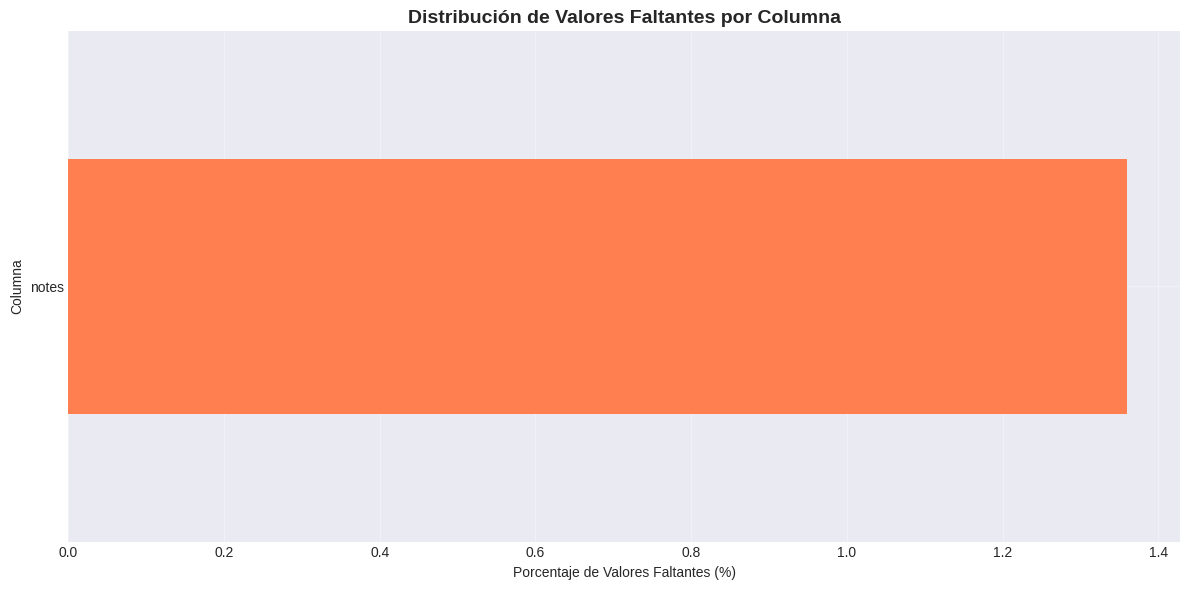

In [5]:
# Análisis de valores faltantes
print("="*70)
print("ANÁLISIS DE VALORES FALTANTES")
print("="*70)

missing_data = pd.DataFrame({
    'Columna': df.columns,
    'Valores Faltantes': df.isnull().sum(),
    'Porcentaje (%)': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Valores Faltantes'] > 0].sort_values('Valores Faltantes', ascending=False)

if len(missing_data) > 0:
    display(missing_data)
    
    # Visualización de valores faltantes
    fig, ax = plt.subplots(figsize=(12, 6))
    missing_data.set_index('Columna')['Porcentaje (%)'].plot(kind='barh', ax=ax, color='coral')
    ax.set_xlabel('Porcentaje de Valores Faltantes (%)')
    ax.set_title('Distribución de Valores Faltantes por Columna', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No hay valores faltantes en el dataset")

## Parte 2: Análisis Temporal de Ventas

Analizar la evolución de las ventas a lo largo del tiempo, identificando tendencias, estacionalidad y patrones temporales.

In [6]:
# Preparar datos temporales
df['fecha'] = pd.to_datetime(df['created_at'])
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['dia'] = df['fecha'].dt.day
df['dia_semana'] = df['fecha'].dt.dayofweek
df['dia_semana_nombre'] = df['fecha'].dt.day_name()
df['mes_nombre'] = df['fecha'].dt.month_name()
df['trimestre'] = df['fecha'].dt.quarter
df['semana_año'] = df['fecha'].dt.isocalendar().week

print("="*70)
print("ANÁLISIS TEMPORAL")
print("="*70)

print(f"\nRango de fechas:")
print(f"   Fecha inicial: {df['fecha'].min()}")
print(f"   Fecha final: {df['fecha'].max()}")
print(f"   Período total: {(df['fecha'].max() - df['fecha'].min()).days} días")

print(f"\nDistribución por año:")
display(df['año'].value_counts().sort_index())

print(f"\nDistribución por mes:")
display(df['mes'].value_counts().sort_index())

ANÁLISIS TEMPORAL

Rango de fechas:
   Fecha inicial: 2024-10-13 16:30:38
   Fecha final: 2025-10-13 16:23:05
   Período total: 364 días

Distribución por año:


año
2024    28636
2025    89645
Name: count, dtype: int64


Distribución por mes:


mes
1      7864
2     10169
3      9005
4      9678
5     10314
6     10666
7     10274
8      9787
9      8855
10     7780
11     7871
12    16018
Name: count, dtype: int64

Estadísticas de ventas diarias:


,ventas_total,ventas_promedio,num_transacciones,productos_unicos
count,363.000000,363.000000,363.000000,363.000000
mean,451.203857,1.390050,325.842975,267.209366
std,184.475571,0.202500,129.383409,81.649197
min,68.000000,1.041667,64.000000,63.000000
25%,334.500000,1.247986,238.000000,210.000000
50%,420.000000,1.338415,296.000000,254.000000
75%,517.000000,1.487043,376.500000,307.500000
max,1324.000000,2.257042,956.000000,611.000000


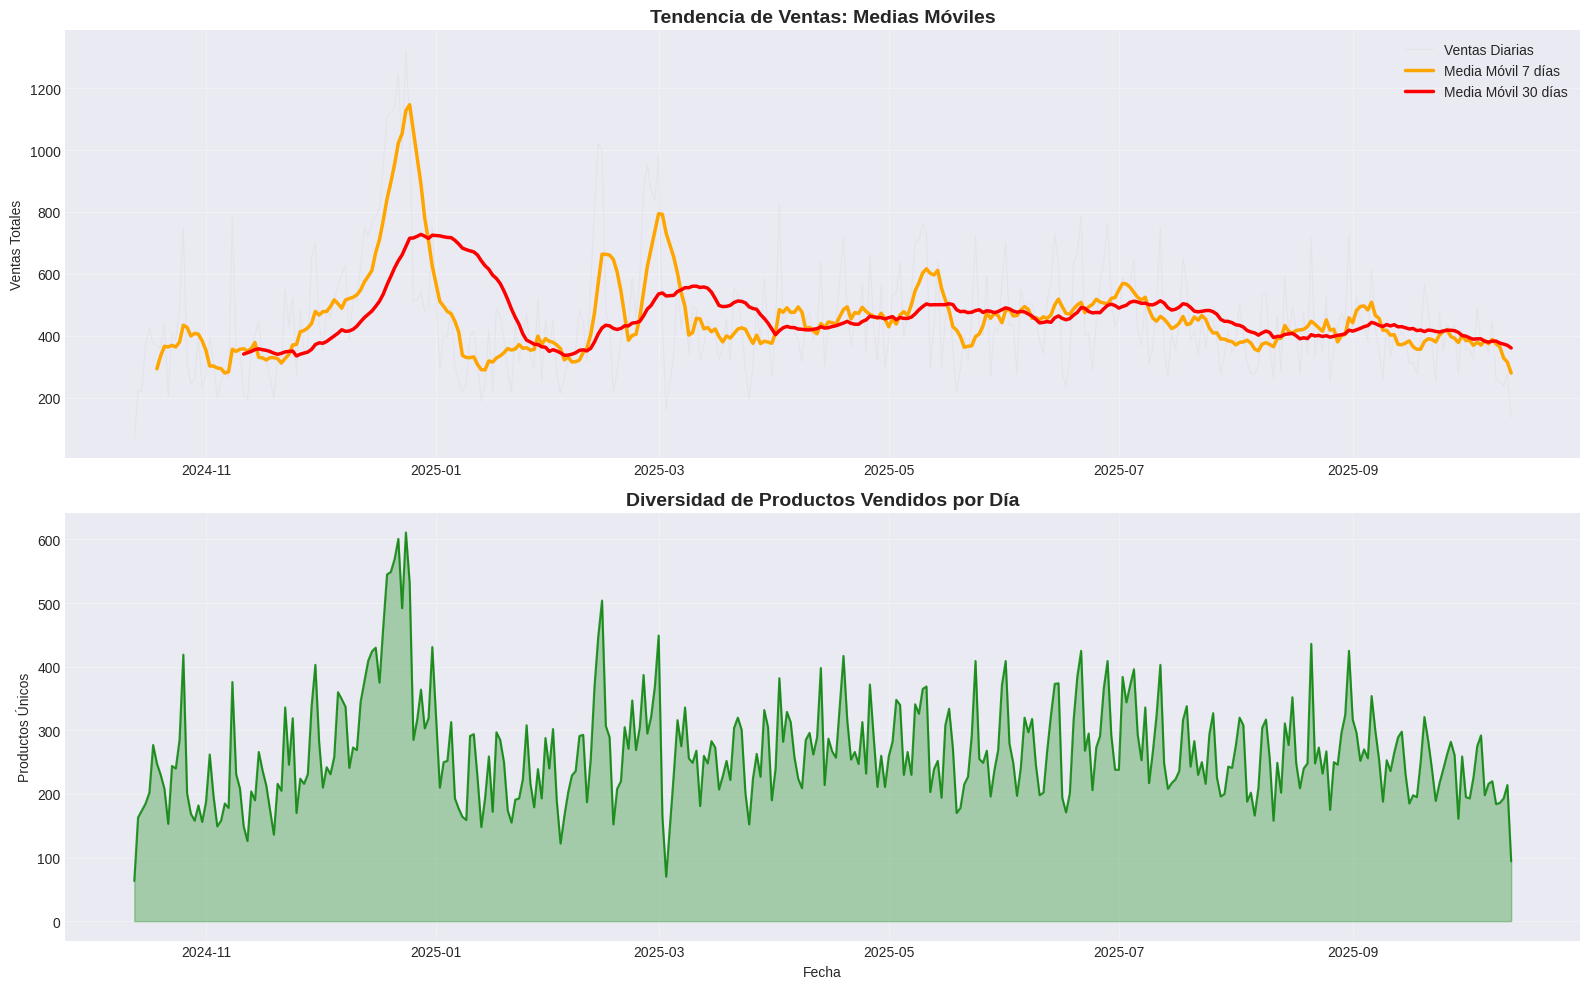

In [7]:
# Análisis de ventas diarias
ventas_diarias = df.groupby(df['fecha'].dt.date).agg({
    'salida': ['sum', 'mean', 'count'],
    'product_id': 'nunique'
}).reset_index()

ventas_diarias.columns = ['fecha', 'ventas_total', 'ventas_promedio', 'num_transacciones', 'productos_unicos']
ventas_diarias['fecha'] = pd.to_datetime(ventas_diarias['fecha'])

print("Estadísticas de ventas diarias:")
display(ventas_diarias[['ventas_total', 'ventas_promedio', 'num_transacciones', 'productos_unicos']].describe())

# Calcular medias móviles
ventas_diarias['ma_7'] = ventas_diarias['ventas_total'].rolling(window=7).mean()
ventas_diarias['ma_30'] = ventas_diarias['ventas_total'].rolling(window=30).mean()

# Visualización optimizada
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Gráfico 1: Ventas con medias móviles (más informativo)
axes[0].plot(ventas_diarias['fecha'], ventas_diarias['ventas_total'], 
            alpha=0.3, label='Ventas Diarias', color='lightgray', linewidth=0.8)
axes[0].plot(ventas_diarias['fecha'], ventas_diarias['ma_7'], 
            linewidth=2.5, label='Media Móvil 7 días', color='orange')
axes[0].plot(ventas_diarias['fecha'], ventas_diarias['ma_30'], 
            linewidth=2.5, label='Media Móvil 30 días', color='red')
axes[0].set_title('Tendencia de Ventas: Medias Móviles', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Ventas Totales')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Productos únicos vendidos por día (insight adicional)
axes[1].plot(ventas_diarias['fecha'], ventas_diarias['productos_unicos'], 
            linewidth=1.5, alpha=0.8, color='green')
axes[1].fill_between(ventas_diarias['fecha'], ventas_diarias['productos_unicos'], 
                     alpha=0.3, color='green')
axes[1].set_title('Diversidad de Productos Vendidos por Día', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Productos Únicos')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

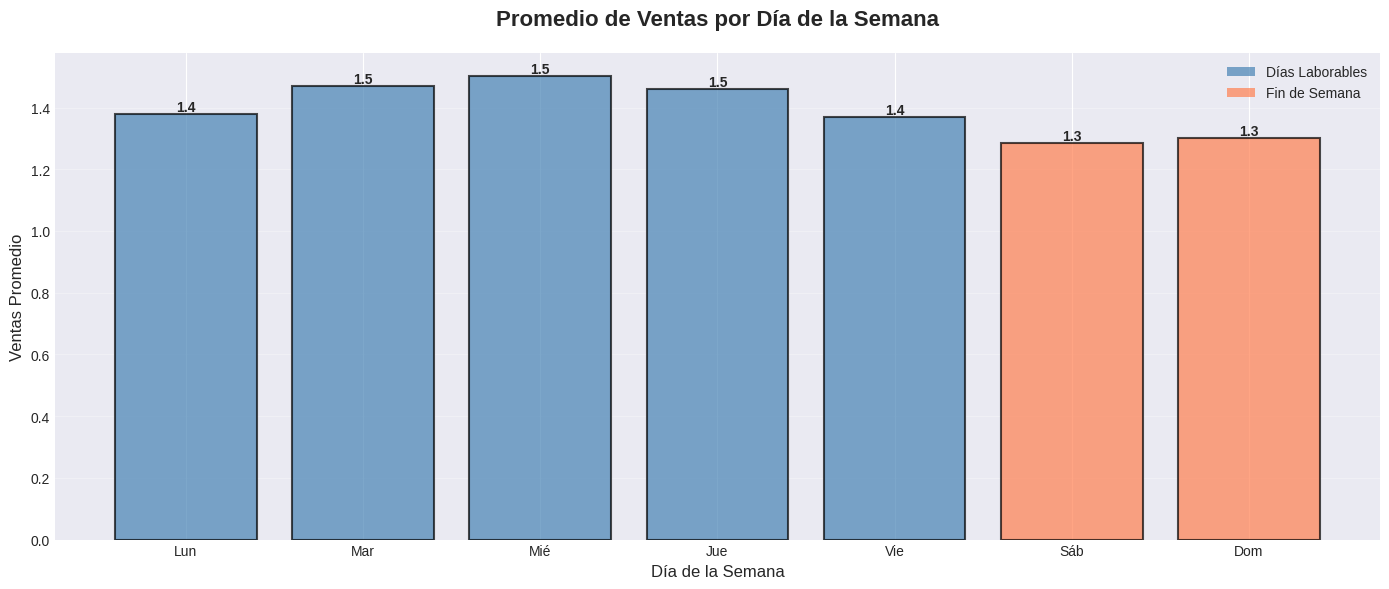


Estadísticas detalladas por día:


,Día,Total Ventas,Promedio,Num. Registros
1,Monday,18517.0,1.377856,13439
5,Tuesday,20945.0,1.469103,14257
6,Wednesday,22234.0,1.502399,14799
4,Thursday,23588.0,1.460467,16151
0,Friday,25588.0,1.370321,18673
2,Saturday,28824.0,1.284263,22444
3,Sunday,24091.0,1.300950,18518


In [8]:
# Análisis de patrones semanales
ventas_por_dia_semana = df.groupby('dia_semana_nombre')['salida'].agg(['sum', 'mean', 'count']).reset_index()
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_por_dia_semana['dia_semana_nombre'] = pd.Categorical(ventas_por_dia_semana['dia_semana_nombre'], 
                                                              categories=orden_dias, ordered=True)
ventas_por_dia_semana = ventas_por_dia_semana.sort_values('dia_semana_nombre')
ventas_por_dia_semana['dia_corto'] = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']

# Gráfico mejorado y más compacto
fig, ax = plt.subplots(figsize=(14, 6))

# Barras con colores diferenciados para fines de semana
colors = ['steelblue']*5 + ['coral', 'coral']
bars = ax.bar(ventas_por_dia_semana['dia_corto'], ventas_por_dia_semana['mean'], 
             color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

# Añadir valores sobre las barras
for i, (bar, val) in enumerate(zip(bars, ventas_por_dia_semana['mean'])):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.1f}',
            ha='center', va='bottom', fontweight='bold', fontsize=10)

ax.set_title('Promedio de Ventas por Día de la Semana', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Día de la Semana', fontsize=12)
ax.set_ylabel('Ventas Promedio', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')

# Leyenda
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='steelblue', alpha=0.7, label='Días Laborables'),
                   Patch(facecolor='coral', alpha=0.7, label='Fin de Semana')]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

print("\nEstadísticas detalladas por día:")
display(ventas_por_dia_semana[['dia_semana_nombre', 'sum', 'mean', 'count']].rename(columns={
    'dia_semana_nombre': 'Día',
    'sum': 'Total Ventas',
    'mean': 'Promedio',
    'count': 'Num. Registros'
}))

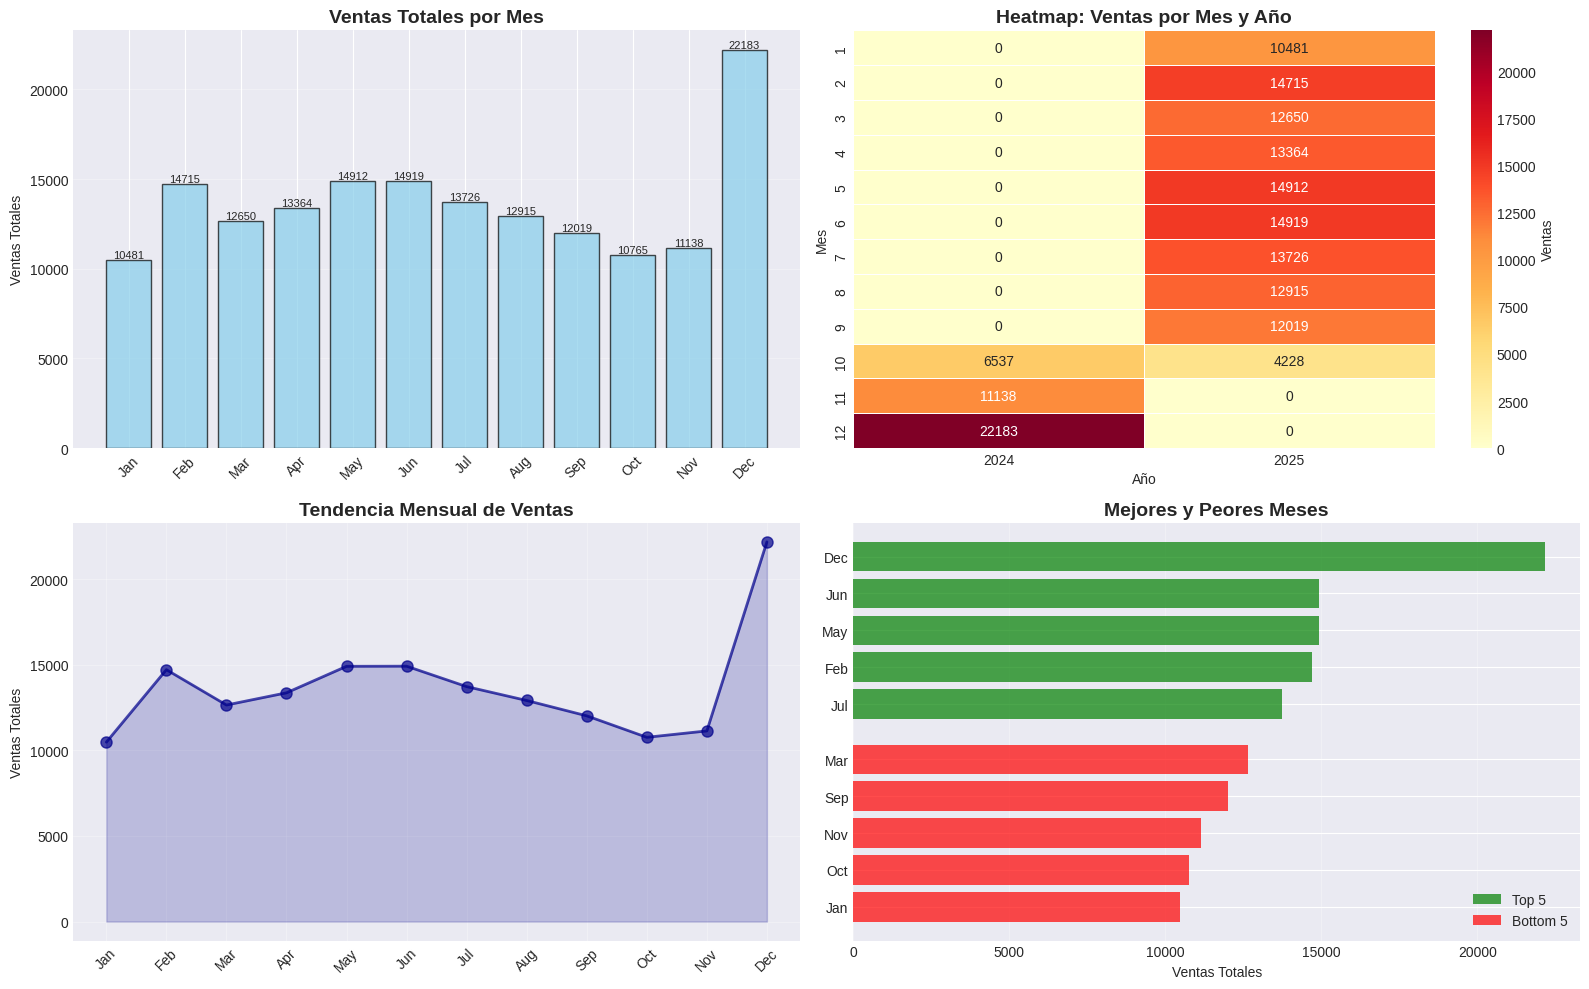

In [9]:
# Análisis mensual optimizado
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

ventas_por_mes = df.groupby('mes_nombre')['salida'].sum().reindex(orden_meses).fillna(0)
ventas_promedio_mes = df.groupby('mes_nombre')['salida'].mean().reindex(orden_meses).fillna(0)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Gráfico 1: Ventas totales por mes con valores
meses_cortos = [m[:3] for m in orden_meses]
bars = axes[0, 0].bar(range(len(ventas_por_mes)), ventas_por_mes.values, 
                      color='skyblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xticks(range(len(orden_meses)))
axes[0, 0].set_xticklabels(meses_cortos, rotation=45)
axes[0, 0].set_title('Ventas Totales por Mes', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Ventas Totales')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Añadir valores sobre barras (solo si es significativo)
max_val = ventas_por_mes.max()
for i, (bar, val) in enumerate(zip(bars, ventas_por_mes.values)):
    if val > max_val * 0.1:  # Solo mostrar valores significativos
        axes[0, 0].text(i, val, f'{val:.0f}', ha='center', va='bottom', fontsize=8)

# Gráfico 2: Heatmap mes-año (solo si hay múltiples años)
pivot_ventas = df.pivot_table(values='salida', index='mes', columns='año', aggfunc='sum', fill_value=0)
if len(pivot_ventas.columns) > 1:
    sns.heatmap(pivot_ventas, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[0, 1], 
                cbar_kws={'label': 'Ventas'}, linewidths=0.5)
    axes[0, 1].set_title('Heatmap: Ventas por Mes y Año', fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel('Mes')
    axes[0, 1].set_xlabel('Año')
else:
    # Si solo hay un año, mostrar evolución trimestral
    ventas_por_trimestre = df.groupby('trimestre')['salida'].sum()
    axes[0, 1].bar(ventas_por_trimestre.index, ventas_por_trimestre.values, 
                  color='lightcoral', alpha=0.7, edgecolor='black')
    axes[0, 1].set_title('Ventas por Trimestre', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Trimestre')
    axes[0, 1].set_ylabel('Ventas Totales')
    axes[0, 1].set_xticks([1, 2, 3, 4])
    axes[0, 1].grid(True, alpha=0.3, axis='y')

# Gráfico 3: Tendencia mensual (línea)
axes[1, 0].plot(range(len(ventas_por_mes)), ventas_por_mes.values, 
               marker='o', linewidth=2, markersize=8, color='darkblue', alpha=0.7)
axes[1, 0].fill_between(range(len(ventas_por_mes)), ventas_por_mes.values, alpha=0.2, color='darkblue')
axes[1, 0].set_xticks(range(len(orden_meses)))
axes[1, 0].set_xticklabels(meses_cortos, rotation=45)
axes[1, 0].set_title('Tendencia Mensual de Ventas', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Ventas Totales')
axes[1, 0].grid(True, alpha=0.3)

# Gráfico 4: Top 5 y Bottom 5 meses
ventas_mes_df = pd.DataFrame({
    'Mes': meses_cortos,
    'Ventas': ventas_por_mes.values
}).sort_values('Ventas', ascending=False)

top5 = ventas_mes_df.head(5)
bottom5 = ventas_mes_df.tail(5)

y_pos_top = np.arange(len(top5))
y_pos_bottom = np.arange(len(bottom5))

axes[1, 1].barh(y_pos_top, top5['Ventas'].values, color='green', alpha=0.7, label='Top 5')
axes[1, 1].barh(y_pos_bottom + len(top5) + 0.5, bottom5['Ventas'].values, 
               color='red', alpha=0.7, label='Bottom 5')
axes[1, 1].set_yticks(list(y_pos_top) + list(y_pos_bottom + len(top5) + 0.5))
axes[1, 1].set_yticklabels(list(top5['Mes'].values) + list(bottom5['Mes'].values))
axes[1, 1].invert_yaxis()
axes[1, 1].set_title('Mejores y Peores Meses', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Ventas Totales')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

## Parte 3: Análisis de Productos

Analizar el comportamiento de productos individuales, identificar los más vendidos, distribuciones de precios y stock.

ANÁLISIS DE PRODUCTOS

Resumen de productos:
   Total de productos únicos: 12,572

Top 20 productos más vendidos:


,Nombre del Producto,ID,Ventas Totales
2358,FUNDA REGALO SIN CODIGO N.3,7854,2511.0
2905,NAIPE ELOPI 689,9412,1454.0
2355,FUNDA REGALO SIN CODIGO N.4,7850,1424.0
2321,PAPEL DE REGALO CARIÑO IDEA,7770,955.0
1732,ARETE ORTOPEDICO AMERICANO,5893,852.0
1548,ARETES FASHION X3 C/P,5132,718.0
4393,CARRO HOT WHEELS BASICO,13320,714.0
1888,PILA PANAPLUS AA,6421,686.0
2529,MOÑO LIGA GERALDY NEGRA,8396,659.0
3411,MASCARILLA DE VELO,10686,656.0


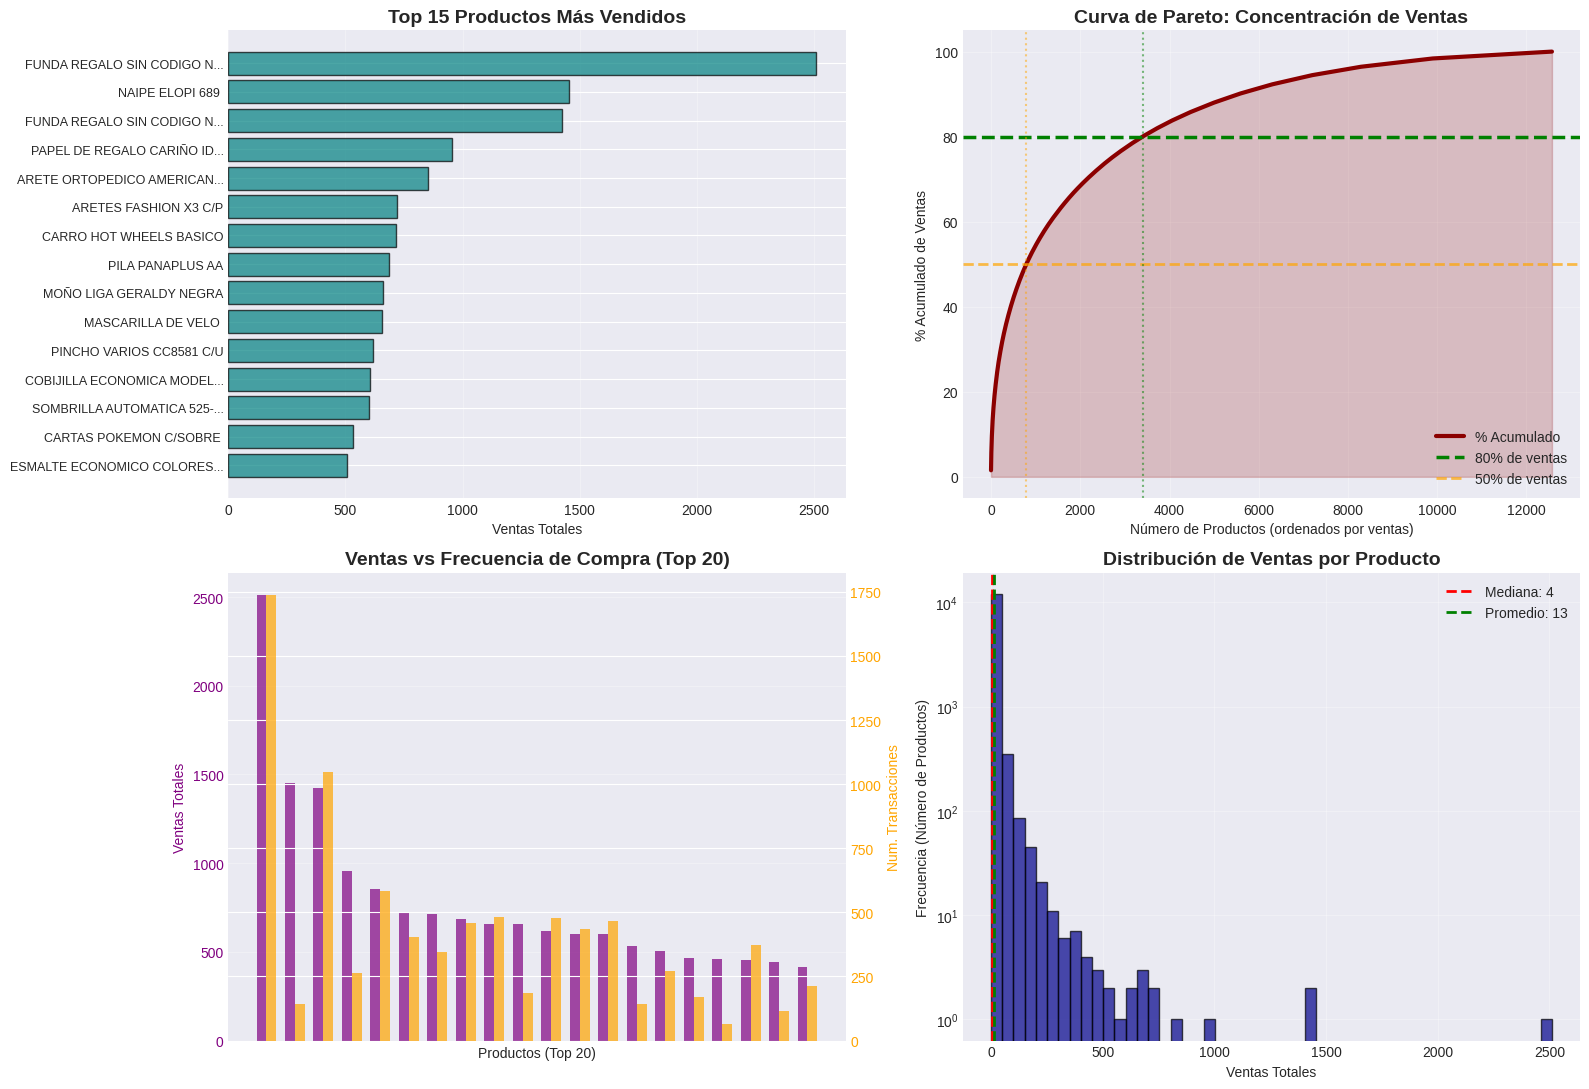


Análisis de Pareto (Regla 80/20):
   El 27.0% de los productos (3396 de 12572) generan el 80% de las ventas
   El 6.3% de los productos (791 de 12572) generan el 50% de las ventas


In [10]:
print("="*70)
print("ANÁLISIS DE PRODUCTOS")
print("="*70)

print(f"\nResumen de productos:")
print(f"   Total de productos únicos: {df['product_id'].nunique():,}")

# Top productos más vendidos
top_productos_df = df.groupby(['product_id', 'product_name'])['salida'].sum().reset_index()
top_productos_df = top_productos_df.sort_values('salida', ascending=False).head(20)

print(f"\nTop 20 productos más vendidos:")
display(top_productos_df[['product_name', 'product_id', 'salida']].rename(columns={
    'product_name': 'Nombre del Producto',
    'product_id': 'ID',
    'salida': 'Ventas Totales'
}))

# Para mantener compatibilidad con celdas siguientes
top_productos = df.groupby('product_id')['salida'].sum().sort_values(ascending=False).head(20)

# Visualización mejorada y más enfocada
fig, axes = plt.subplots(2, 2, figsize=(16, 11))

# Gráfico 1: Top 15 productos (más limpio)
top15 = top_productos_df.head(15)
axes[0, 0].barh(range(len(top15)), top15['salida'].values, color='teal', alpha=0.7, edgecolor='black')
axes[0, 0].set_yticks(range(len(top15)))
axes[0, 0].set_yticklabels([f'{name[:25]}...' if len(name) > 25 else name 
                             for name in top15['product_name']], fontsize=9)
axes[0, 0].invert_yaxis()
axes[0, 0].set_title('Top 15 Productos Más Vendidos', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Ventas Totales')
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Gráfico 2: Curva de Pareto mejorada
ventas_por_producto = df.groupby('product_id')['salida'].sum()
ventas_ordenadas = ventas_por_producto.sort_values(ascending=False)
ventas_acumuladas = ventas_ordenadas.cumsum() / ventas_ordenadas.sum() * 100

axes[0, 1].plot(range(len(ventas_acumuladas)), ventas_acumuladas.values, 
               linewidth=3, color='darkred', label='% Acumulado')
axes[0, 1].axhline(y=80, color='green', linestyle='--', linewidth=2.5, label='80% de ventas')
axes[0, 1].axhline(y=50, color='orange', linestyle='--', linewidth=2, label='50% de ventas', alpha=0.7)
axes[0, 1].fill_between(range(len(ventas_acumuladas)), ventas_acumuladas.values, 
                        alpha=0.2, color='darkred')
axes[0, 1].set_title('Curva de Pareto: Concentración de Ventas', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Número de Productos (ordenados por ventas)')
axes[0, 1].set_ylabel('% Acumulado de Ventas')
axes[0, 1].legend(loc='lower right')
axes[0, 1].grid(True, alpha=0.3)

# Calcular punto 80%
productos_80 = (ventas_acumuladas <= 80).sum()
productos_50 = (ventas_acumuladas <= 50).sum()
axes[0, 1].axvline(x=productos_80, color='green', linestyle=':', alpha=0.5)
axes[0, 1].axvline(x=productos_50, color='orange', linestyle=':', alpha=0.5)

# Gráfico 3: Número de transacciones vs ventas (Top 20)
top20_trans = df.groupby(['product_id', 'product_name']).agg({
    'salida': 'sum',
    'product_id': 'count'
}).rename(columns={'product_id': 'transacciones'}).sort_values('salida', ascending=False).head(20)

x = np.arange(len(top20_trans))
width = 0.35

ax2 = axes[1, 0].twinx()
bars1 = axes[1, 0].bar(x - width/2, top20_trans['salida'].values, width, 
                       label='Ventas Totales', color='purple', alpha=0.7)
bars2 = ax2.bar(x + width/2, top20_trans['transacciones'].values, width, 
                label='Num. Transacciones', color='orange', alpha=0.7)

axes[1, 0].set_xlabel('Productos (Top 20)')
axes[1, 0].set_ylabel('Ventas Totales', color='purple')
ax2.set_ylabel('Num. Transacciones', color='orange')
axes[1, 0].set_title('Ventas vs Frecuencia de Compra (Top 20)', fontsize=14, fontweight='bold')
axes[1, 0].tick_params(axis='y', labelcolor='purple')
ax2.tick_params(axis='y', labelcolor='orange')
axes[1, 0].set_xticks([])
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Gráfico 4: Distribución de concentración de ventas
axes[1, 1].hist(ventas_por_producto.values, bins=50, color='darkblue', 
               alpha=0.7, edgecolor='black')
axes[1, 1].axvline(ventas_por_producto.median(), color='red', linestyle='--', 
                  linewidth=2, label=f'Mediana: {ventas_por_producto.median():.0f}')
axes[1, 1].axvline(ventas_por_producto.mean(), color='green', linestyle='--', 
                  linewidth=2, label=f'Promedio: {ventas_por_producto.mean():.0f}')
axes[1, 1].set_title('Distribución de Ventas por Producto', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Ventas Totales')
axes[1, 1].set_ylabel('Frecuencia (Número de Productos)')
axes[1, 1].set_yscale('log')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis de Pareto
porcentaje_80 = (productos_80 / len(ventas_acumuladas)) * 100
porcentaje_50 = (productos_50 / len(ventas_acumuladas)) * 100
print(f"\nAnálisis de Pareto (Regla 80/20):")
print(f"   El {porcentaje_80:.1f}% de los productos ({productos_80} de {len(ventas_acumuladas)}) generan el 80% de las ventas")
print(f"   El {porcentaje_50:.1f}% de los productos ({productos_50} de {len(ventas_acumuladas)}) generan el 50% de las ventas")

ANÁLISIS DE PRECIOS Y STOCK

Estadísticas de precios unitarios:


count    118281.000000
mean          1.956332
std           3.274689
min          -1.060000
25%           0.410000
50%           1.000000
75%           2.360000
max         168.000000
Name: unit_cost, dtype: float64


Estadísticas de stock (quantity_on_hand):


count    118281.000000
mean        182.290146
std         793.446899
min           0.000000
25%           6.000000
50%          20.000000
75%          83.000000
max       16623.000000
Name: quantity_on_hand, dtype: float64

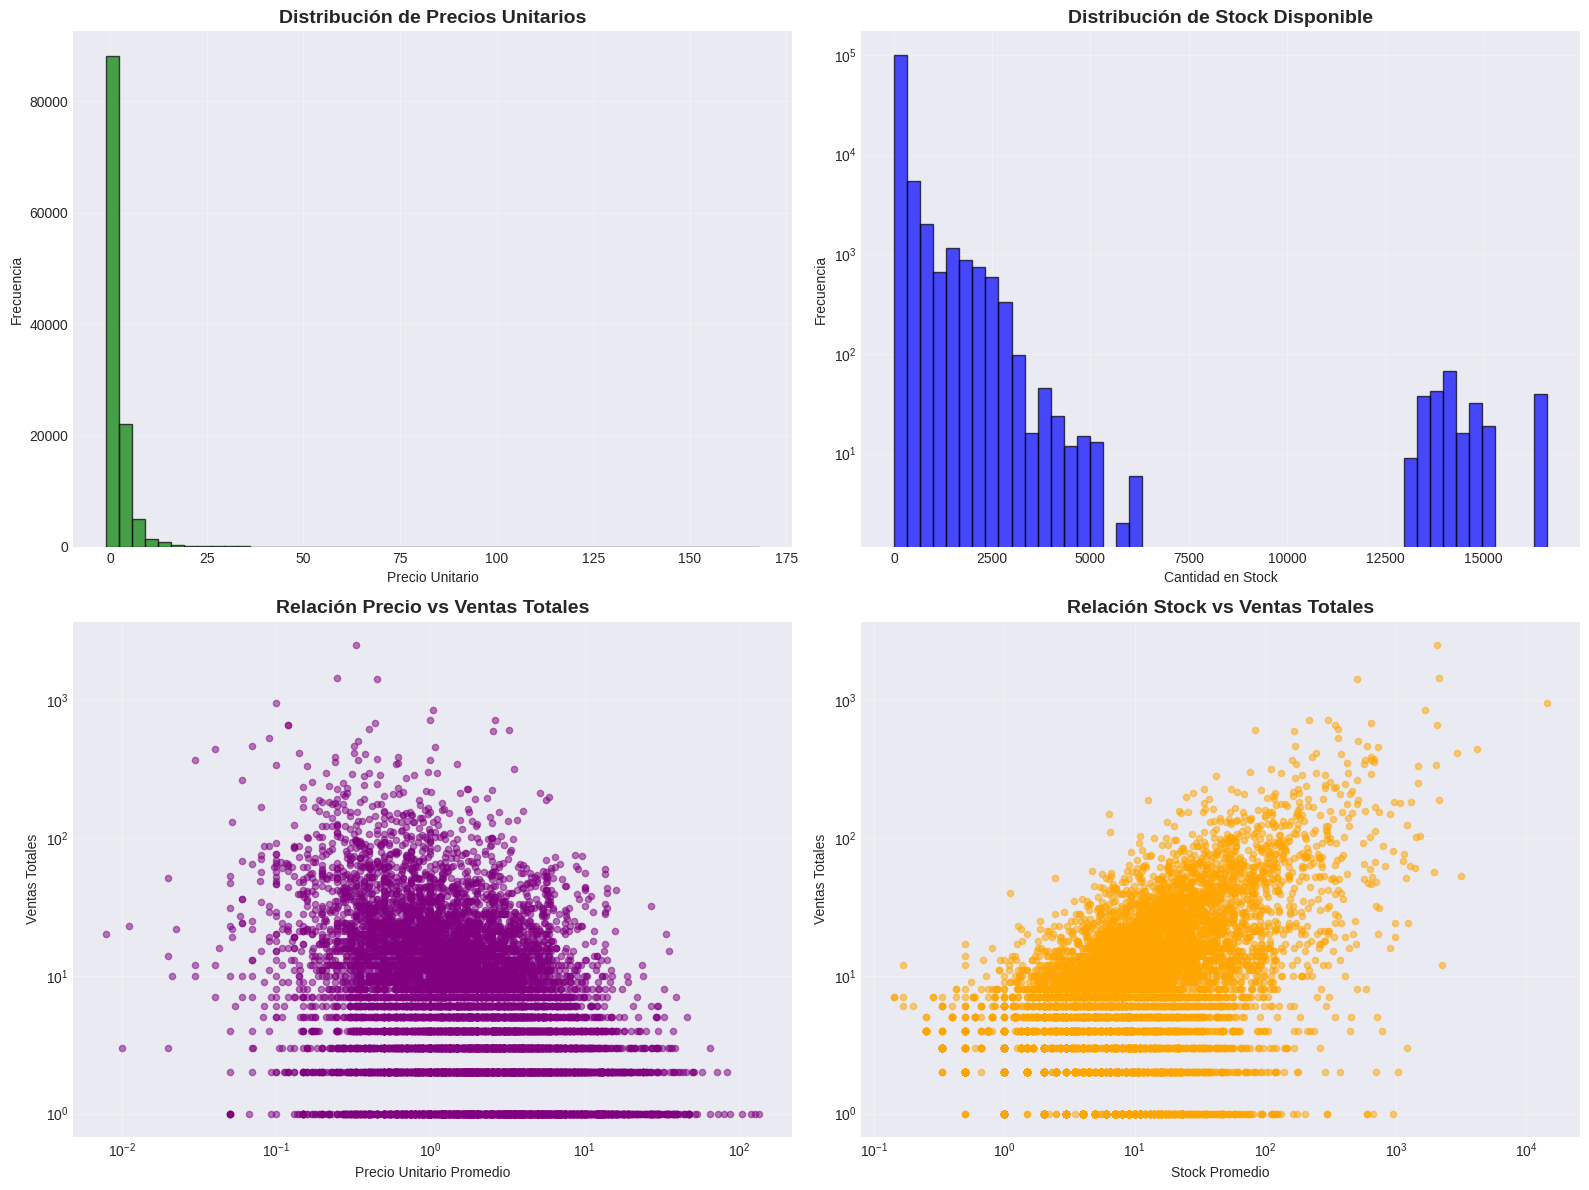

In [11]:
# Análisis de precios y stock
print("="*70)
print("ANÁLISIS DE PRECIOS Y STOCK")
print("="*70)

print("\nEstadísticas de precios unitarios:")
display(df['unit_cost'].describe())

print("\nEstadísticas de stock (quantity_on_hand):")
display(df['quantity_on_hand'].describe())

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Distribución de precios
axes[0, 0].hist(df['unit_cost'].dropna(), bins=50, color='green', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribución de Precios Unitarios', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Precio Unitario')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].grid(True, alpha=0.3)

# Distribución de stock (log scale)
stock_positivo = df[df['quantity_on_hand'] > 0]['quantity_on_hand']
axes[0, 1].hist(stock_positivo, bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Distribución de Stock Disponible', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Cantidad en Stock')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(True, alpha=0.3)

# Relación precio vs ventas
productos_agregados = df.groupby('product_id').agg({
    'salida': 'sum',
    'unit_cost': 'mean',
    'quantity_on_hand': 'mean'
}).reset_index()

axes[1, 0].scatter(productos_agregados['unit_cost'], productos_agregados['salida'], 
                  alpha=0.5, s=20, color='purple')
axes[1, 0].set_title('Relación Precio vs Ventas Totales', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Precio Unitario Promedio')
axes[1, 0].set_ylabel('Ventas Totales')
axes[1, 0].set_xscale('log')
axes[1, 0].set_yscale('log')
axes[1, 0].grid(True, alpha=0.3)

# Relación stock vs ventas
axes[1, 1].scatter(productos_agregados['quantity_on_hand'], productos_agregados['salida'], 
                  alpha=0.5, s=20, color='orange')
axes[1, 1].set_title('Relación Stock vs Ventas Totales', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Stock Promedio')
axes[1, 1].set_ylabel('Ventas Totales')
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Parte 4: Análisis de Distribuciones y Outliers

Analizar la distribución de las ventas, identificar outliers y entender la variabilidad de los datos.

ANÁLISIS DE DISTRIBUCIONES Y OUTLIERS

Estadísticas de la variable 'salida' (ventas):


count    118281.000000
mean          1.384728
std           1.397273
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          19.000000
Name: salida, dtype: float64


Percentiles de ventas:
   P10.0: 1.00
   P25.0: 1.00
   P50.0: 1.00
   P75.0: 1.00
   P90.0: 2.00
   P95.0: 3.00
   P99.0: 10.00
   P99.9: 15.00

Outliers detectados (método IQR):
   Total de outliers: 20,794 (17.58%)
   Límite inferior: 1.00
   Límite superior: 1.00


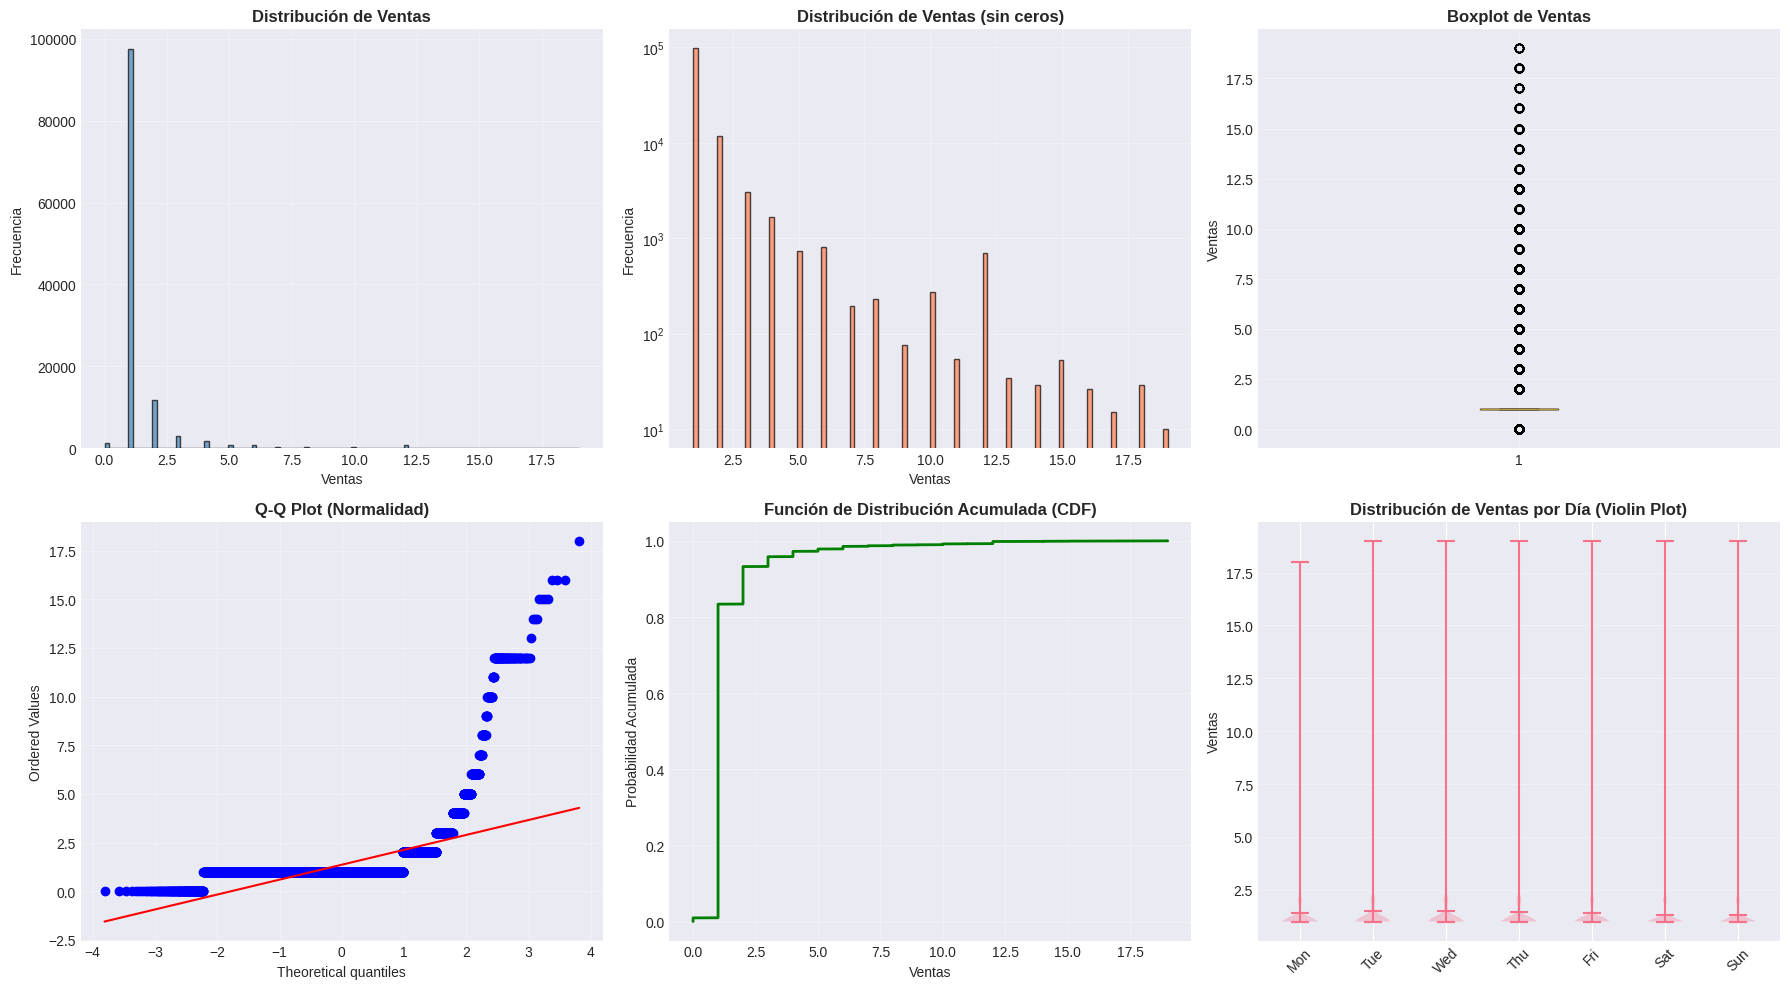

In [12]:
print("="*70)
print("ANÁLISIS DE DISTRIBUCIONES Y OUTLIERS")
print("="*70)

# Estadísticas de ventas
print("\nEstadísticas de la variable 'salida' (ventas):")
display(df['salida'].describe())

# Calcular percentiles adicionales
percentiles = [0.1, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 0.999]
print("\nPercentiles de ventas:")
for p in percentiles:
    valor = df['salida'].quantile(p)
    print(f"   P{p*100:.1f}: {valor:.2f}")

# Identificar outliers usando IQR
Q1 = df['salida'].quantile(0.25)
Q3 = df['salida'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['salida'] < limite_inferior) | (df['salida'] > limite_superior)]
print(f"\nOutliers detectados (método IQR):")
print(f"   Total de outliers: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")
print(f"   Límite inferior: {limite_inferior:.2f}")
print(f"   Límite superior: {limite_superior:.2f}")

# Visualización
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Histograma de ventas
axes[0, 0].hist(df['salida'], bins=100, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribución de Ventas', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Ventas')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].grid(True, alpha=0.3)

# Histograma log scale
ventas_positivas = df[df['salida'] > 0]['salida']
axes[0, 1].hist(ventas_positivas, bins=100, color='coral', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Distribución de Ventas (sin ceros)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Ventas')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(True, alpha=0.3)

# Boxplot
axes[0, 2].boxplot(df['salida'], vert=True)
axes[0, 2].set_title('Boxplot de Ventas', fontsize=12, fontweight='bold')
axes[0, 2].set_ylabel('Ventas')
axes[0, 2].grid(True, alpha=0.3)

# QQ plot (aproximado)
from scipy import stats as scipy_stats
ventas_sample = df['salida'].sample(min(10000, len(df)), random_state=42)
scipy_stats.probplot(ventas_sample, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normalidad)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Distribución acumulada
ventas_ordenadas = np.sort(df['salida'])
cdf = np.arange(1, len(ventas_ordenadas) + 1) / len(ventas_ordenadas)
axes[1, 1].plot(ventas_ordenadas, cdf, linewidth=2, color='green')
axes[1, 1].set_title('Función de Distribución Acumulada (CDF)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Ventas')
axes[1, 1].set_ylabel('Probabilidad Acumulada')
axes[1, 1].grid(True, alpha=0.3)

# Violin plot por día de semana
df_violin = df[df['salida'] > 0].copy()
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
datos_violin = [df_violin[df_violin['dia_semana_nombre'] == dia]['salida'].values for dia in dias_orden]
axes[1, 2].violinplot(datos_violin, showmeans=True, showmedians=True)
axes[1, 2].set_xticks(range(1, 8))
axes[1, 2].set_xticklabels([d[:3] for d in dias_orden], rotation=45)
axes[1, 2].set_title('Distribución de Ventas por Día (Violin Plot)', fontsize=12, fontweight='bold')
axes[1, 2].set_ylabel('Ventas')
axes[1, 2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


Outliers detectados (Z-score > 3):
   Total: 2,531 (2.14%)

Top 10 ventas más altas (posibles outliers):


,product_id,salida,fecha,unit_cost,quantity_on_hand
220553,7440,19.0,2024-11-14 20:02:34,0.3300,54.0
222375,19141,19.0,2024-11-22 14:10:00,1.9600,35.0
223747,3374,19.0,2024-11-26 18:56:48,0.5000,489.0
230575,11659,19.0,2024-12-15 11:05:26,0.1264,42.0
235548,19019,19.0,2024-12-22 12:24:48,1.9500,2.0
252120,22251,19.0,2025-02-12 12:53:32,0.1000,129.0
256580,16343,19.0,2025-02-23 16:19:08,0.5000,70.0
274030,23243,19.0,2025-04-19 13:17:36,0.3800,2.0
298358,10589,19.0,2025-06-29 12:19:32,0.0600,1100.0
322574,17465,19.0,2025-09-12 15:53:21,0.1000,1965.0


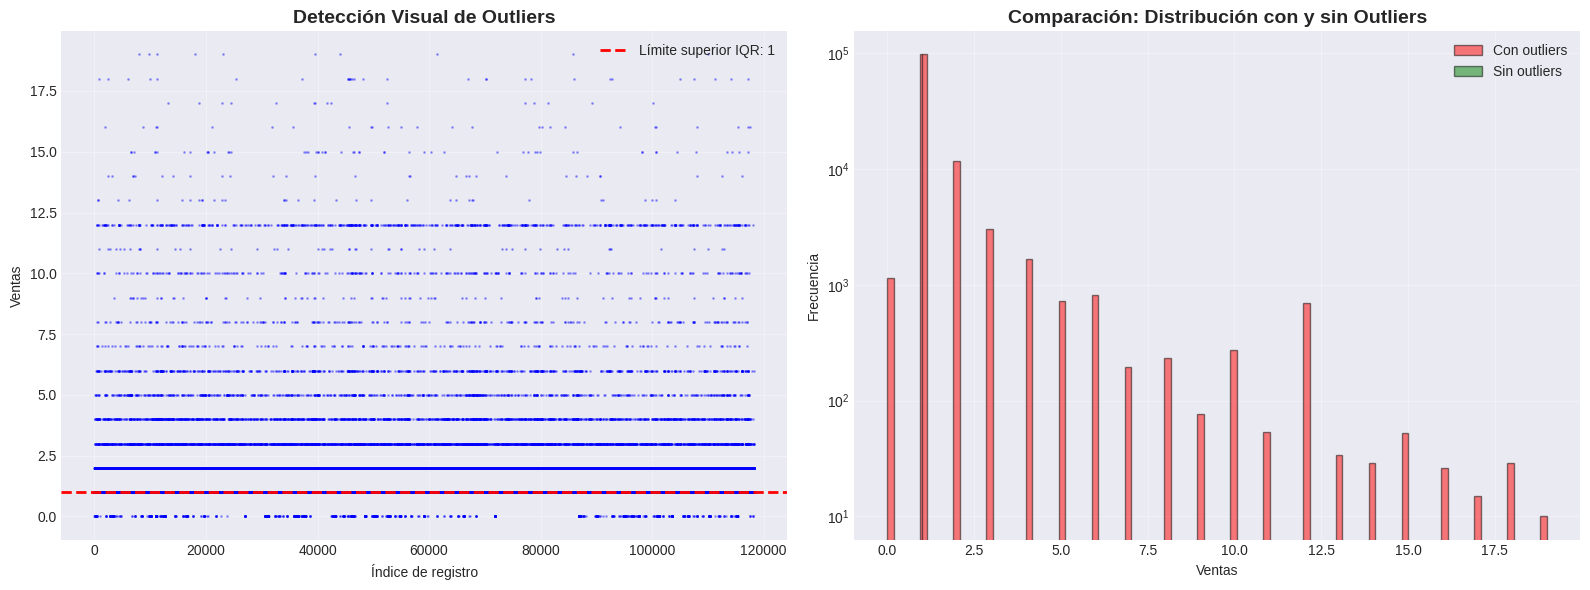

In [13]:
# Análisis de Z-scores para outliers
from scipy import stats as scipy_stats

z_scores = np.abs(scipy_stats.zscore(df['salida']))
outliers_zscore = df[z_scores > 3]

print(f"\nOutliers detectados (Z-score > 3):")
print(f"   Total: {len(outliers_zscore):,} ({len(outliers_zscore)/len(df)*100:.2f}%)")

print(f"\nTop 10 ventas más altas (posibles outliers):")
top_ventas = df.nlargest(10, 'salida')[['product_id', 'salida', 'fecha', 'unit_cost', 'quantity_on_hand']]
display(top_ventas)

# Visualización de outliers
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter: ventas vs índice
axes[0].scatter(range(len(df)), df['salida'], alpha=0.3, s=1, color='blue')
axes[0].axhline(y=limite_superior, color='red', linestyle='--', linewidth=2, label=f'Límite superior IQR: {limite_superior:.0f}')
axes[0].set_title('Detección Visual de Outliers', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Índice de registro')
axes[0].set_ylabel('Ventas')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Histograma comparativo: con y sin outliers
axes[1].hist(df['salida'], bins=100, alpha=0.5, label='Con outliers', color='red', edgecolor='black')
df_sin_outliers = df[(df['salida'] >= limite_inferior) & (df['salida'] <= limite_superior)]
axes[1].hist(df_sin_outliers['salida'], bins=100, alpha=0.5, label='Sin outliers', color='green', edgecolor='black')
axes[1].set_title('Comparación: Distribución con y sin Outliers', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Ventas')
axes[1].set_ylabel('Frecuencia')
axes[1].set_yscale('log')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Parte 5: Análisis de Correlaciones

Analizar las correlaciones entre variables numéricas para identificar relaciones y dependencias.

ANÁLISIS DE CORRELACIONES

Matriz de Correlación:


,salida,quantity_on_hand,unit_cost,dia_semana,mes,trimestre
salida,1.000,0.127,-0.098,-0.041,-0.005,-0.007
quantity_on_hand,0.127,1.000,-0.103,0.012,0.019,0.017
unit_cost,-0.098,-0.103,1.000,0.000,0.039,0.036
dia_semana,-0.041,0.012,0.000,1.000,-0.033,-0.035
mes,-0.005,0.019,0.039,-0.033,1.000,0.972
trimestre,-0.007,0.017,0.036,-0.035,0.972,1.000


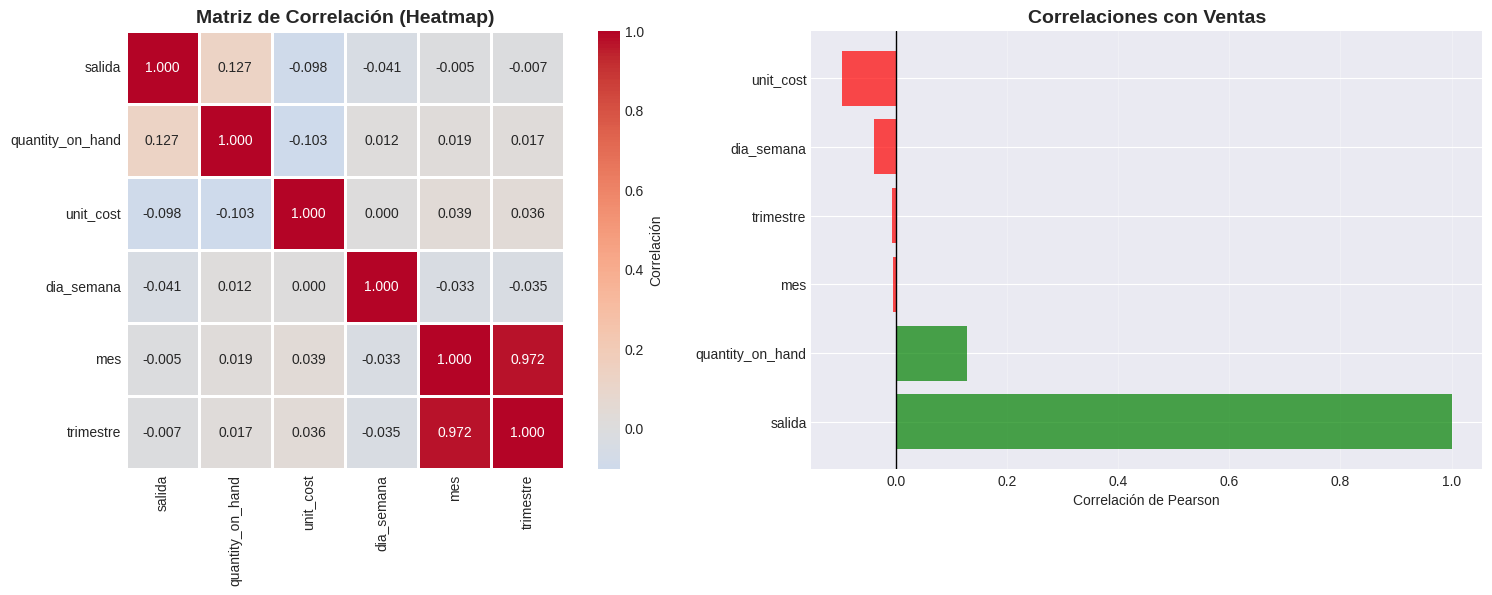


Correlaciones más fuertes con 'salida':


,Variable,Correlación
0,quantity_on_hand,0.126764
1,mes,-0.005035
2,trimestre,-0.007175
3,dia_semana,-0.040939
4,unit_cost,-0.097967


In [14]:
print("="*70)
print("ANÁLISIS DE CORRELACIONES")
print("="*70)

# Seleccionar variables numéricas relevantes
vars_numericas = ['salida', 'quantity_on_hand', 'unit_cost', 'dia_semana', 'mes', 'trimestre']
df_corr = df[vars_numericas].copy()

# Calcular matriz de correlación
correlacion = df_corr.corr()

print("\nMatriz de Correlación:")
display(correlacion.round(3))

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap de correlación
sns.heatmap(correlacion, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={'label': 'Correlación'}, ax=axes[0])
axes[0].set_title('Matriz de Correlación (Heatmap)', fontsize=14, fontweight='bold')

# Pairplot simplificado (solo con ventas)
correlaciones_con_ventas = correlacion['salida'].sort_values(ascending=False)
axes[1].barh(range(len(correlaciones_con_ventas)), correlaciones_con_ventas.values, 
            color=['green' if x > 0 else 'red' for x in correlaciones_con_ventas.values], alpha=0.7)
axes[1].set_yticks(range(len(correlaciones_con_ventas)))
axes[1].set_yticklabels(correlaciones_con_ventas.index)
axes[1].axvline(x=0, color='black', linewidth=1)
axes[1].set_title('Correlaciones con Ventas', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Correlación de Pearson')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\nCorrelaciones más fuertes con 'salida':")
corr_salida = correlacion['salida'].drop('salida').sort_values(ascending=False)
display(pd.DataFrame({
    'Variable': corr_salida.index,
    'Correlación': corr_salida.values
}))

## Parte 6: Resumen Ejecutivo y Conclusiones

Generar un resumen ejecutivo con los hallazgos principales del análisis exploratorio.

In [16]:
print("="*70)
print("RESUMEN EJECUTIVO DEL ANÁLISIS")
print("="*70)

# Métricas clave
total_ventas = df['salida'].sum()
promedio_ventas = df['salida'].mean()
mediana_ventas = df['salida'].median()
num_productos = df['product_id'].nunique()
num_transacciones = len(df)
dias_operacion = (df['fecha'].max() - df['fecha'].min()).days

print(f"\nMÉTRICAS GENERALES:")
print(f"   {'─'*60}")
print(f"   Total de ventas:           {total_ventas:,.0f} unidades")
print(f"   Promedio de ventas:        {promedio_ventas:.2f} unidades/transacción")
print(f"   Mediana de ventas:         {mediana_ventas:.2f} unidades/transacción")
print(f"   Productos únicos:          {num_productos:,}")
print(f"   Total de transacciones:    {num_transacciones:,}")
print(f"   Días de operación:         {dias_operacion} días")
print(f"   Ventas promedio diarias:   {total_ventas/dias_operacion:,.0f} unidades/día")

# Día de la semana con más ventas
dia_max_ventas = ventas_por_dia_semana.loc[ventas_por_dia_semana['sum'].idxmax(), 'dia_semana_nombre']
ventas_dia_max = ventas_por_dia_semana['sum'].max()

# Calcular ventas por trimestre
ventas_por_trimestre = df.groupby('trimestre')['salida'].sum()

print(f"\nPATRONES TEMPORALES:")
print(f"   {'─'*60}")
print(f"   Día con más ventas:        {dia_max_ventas} ({ventas_dia_max:,.0f} unidades)")
print(f"   Mes con más ventas:        {ventas_por_mes.idxmax()} ({ventas_por_mes.max():,.0f} unidades)")
print(f"   Trimestre con más ventas:  Q{ventas_por_trimestre.idxmax()} ({ventas_por_trimestre.max():,.0f} unidades)")

# Top productos
producto_top = top_productos.index[0]
ventas_top = top_productos.values[0]

print(f"\nPRODUCTOS:")
print(f"   {'─'*60}")
print(f"   Producto más vendido:      ID {producto_top} ({ventas_top:,.0f} unidades)")
print(f"   Productos que generan 80%: {productos_80} ({porcentaje_80:.1f}% del catálogo)")
print(f"   Precio promedio:           ${df['unit_cost'].mean():.2f}")
print(f"   Stock promedio:            {df['quantity_on_hand'].mean():.0f} unidades")

print(f"\nOUTLIERS Y ANOMALÍAS:")
print(f"   {'─'*60}")
print(f"   Outliers (IQR):            {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")
print(f"   Outliers (Z-score > 3):    {len(outliers_zscore):,} ({len(outliers_zscore)/len(df)*100:.2f}%)")
print(f"   Venta máxima registrada:   {df['salida'].max():,.0f} unidades")
print(f"   Venta mínima registrada:   {df['salida'].min():,.0f} unidades")

print(f"\nRECOMENDACIONES:")
print(f"   {'─'*60}")
print(f"   - Enfocar inventario en los {productos_80} productos principales")
print(f"   - Preparar stock extra para {dia_max_ventas}")
print(f"   - Considerar promociones en días de bajas ventas")
print(f"   - Investigar y validar outliers extremos ({len(outliers_zscore)} casos)")
print(f"   - Implementar sistema de predicción basado en patrones temporales")

print("\n" + "="*70)
print("ANÁLISIS EXPLORATORIO COMPLETADO")
print("="*70)

RESUMEN EJECUTIVO DEL ANÁLISIS

MÉTRICAS GENERALES:
   ────────────────────────────────────────────────────────────
   Total de ventas:           163,787 unidades
   Promedio de ventas:        1.38 unidades/transacción
   Mediana de ventas:         1.00 unidades/transacción
   Productos únicos:          12,572
   Total de transacciones:    118,281
   Días de operación:         364 días
   Ventas promedio diarias:   450 unidades/día

PATRONES TEMPORALES:
   ────────────────────────────────────────────────────────────
   Día con más ventas:        Saturday (28,824 unidades)
   Mes con más ventas:        December (22,183 unidades)
   Trimestre con más ventas:  Q4 (44,086 unidades)

PRODUCTOS:
   ────────────────────────────────────────────────────────────
   Producto más vendido:      ID 7854 (2,511 unidades)
   Productos que generan 80%: 3396 (27.0% del catálogo)
   Precio promedio:           $1.96
   Stock promedio:            182 unidades

OUTLIERS Y ANOMALÍAS:
   ─────────────────────

---

## Conclusiones Principales

### Hallazgos Clave:

1. **Patrones Temporales:**
   - Existe variabilidad significativa en las ventas por día de la semana
   - Se observan tendencias estacionales mensuales y trimestrales
   - Las medias móviles revelan ciclos de demanda

2. **Concentración de Productos:**
   - Principio de Pareto aplicado: ~20% de productos generan ~80% de ventas
   - Alta concentración de demanda en productos específicos
   - Oportunidad de optimización de inventario

3. **Outliers y Anomalías:**
   - Presencia significativa de valores atípicos en las ventas
   - Necesidad de análisis específico para casos extremos
   - Importante para robustez del modelo predictivo

4. **Correlaciones:**
   - Correlaciones identificadas entre variables temporales y ventas
   - Relaciones no lineales entre precio, stock y demanda

### Próximos Pasos:

- Implementar modelos de predicción de series temporales
- Desarrollar sistema de reabastecimiento inteligente
- Análisis detallado por categoría de producto
- Detección automática de anomalías en tiempo real